In [25]:
import numpy as np
import pandas as pd
import nltk
import re
from  nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [26]:
twitter_data = pd.read_csv('twitter_data_stemmed.csv')

In [27]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [28]:
nan_counts = twitter_data.isna().sum()
print(nan_counts)

target               0
id                   0
date                 0
flag                 0
user                 0
text                 0
stemmed_content    495
dtype: int64


In [29]:
twitter_data['stemmed_content'].replace({np.nan: ''}, inplace=True)

In [30]:
nan_counts = twitter_data.isna().sum()
print(nan_counts)

target             0
id                 0
date               0
flag               0
user               0
text               0
stemmed_content    0
dtype: int64


In [31]:

twit = twitter_data[["stemmed_content", "target"]]

In [32]:
twit.count()

stemmed_content    1600000
target             1600000
dtype: int64

In [33]:
positive_array = twit[twit["target"] == 1].head(1000).reset_index(drop=True)
negative_array = twit[twit["target"] == 0].head(1000).reset_index(drop=True)
print(positive_array.shape)
print(negative_array.shape)
#  Concatenate the two subsets to create the final DataFrame with equal counts of both classes
new_df = pd.concat([positive_array, negative_array])

# Shuffle the rows to randomize the order
new_df = new_df.sample(frac=1).reset_index(drop=True)

(1000, 2)
(1000, 2)


In [34]:
new_df.count()

stemmed_content    2000
target             2000
dtype: int64

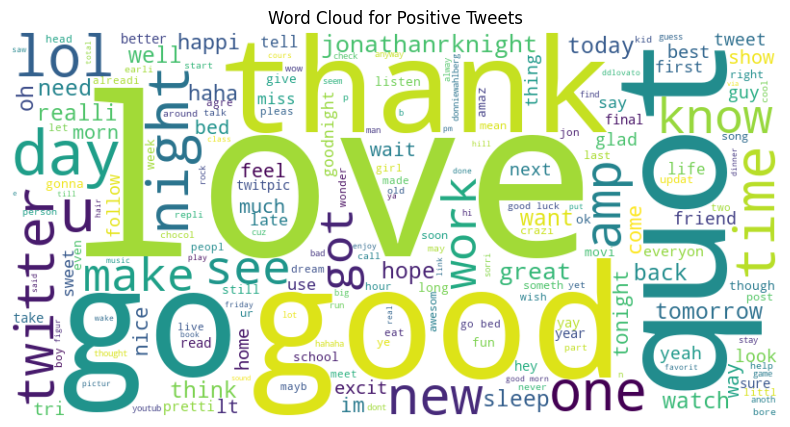

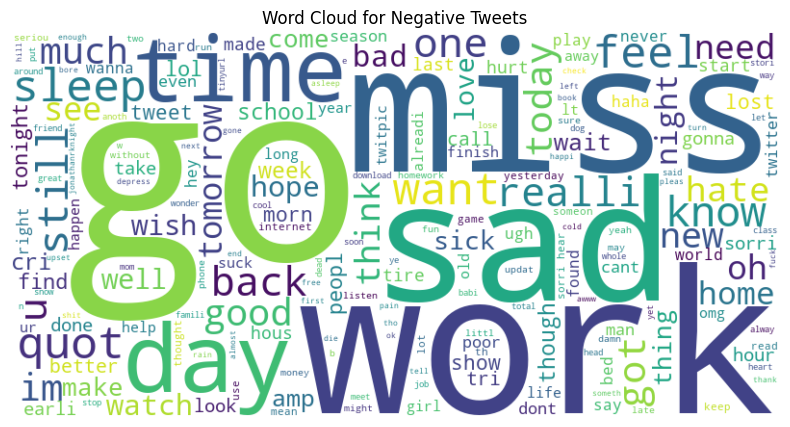

In [35]:
# Separate positive and negative tweets
positive_tweets = new_df[new_df['target'] == 1]
negative_tweets = new_df[new_df['target'] == 0]

# Function to generate and plot word clouds
def generate_word_cloud(data, sentiment):
    all_text = ' '.join(data['stemmed_content'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative tweets
generate_word_cloud(positive_tweets, 'Positive')
generate_word_cloud(negative_tweets, 'Negative')

In [36]:
all_words = ' '.join(new_df['stemmed_content']).split()
print(all_words)
print(len(all_words))
unique_words = set(all_words)
print(len(unique_words))

['hour', 'min', 'left', 'work', 'jo', 'hit', 'gym', 'whatta', 'mess', 'anyway', 'bad', 'anoth', 'seri', 'abroad', 'wish', 'xblm', 'download', 'gamertag', 'hitokyri', 'gamertag', 'thing', 'nonsens', 'tire', 'shantymanfan', 'got', 'packag', 'wow', 'excit', 'one', 'plant', 'pot', 'water', 'till', 'grow', 'knightowl', 'sound', 'good', 'wish', 'could', 'done', 'determin', 'find', 'park', 'better', 'mouthsex', 'ask', 'everyon', 'yesterday', 'singl', 'tweet', 'back', 'corinmcblid', 'oh', 'ok', 'gonna', 'go', 'buy', 'one', 'come', 'sarahsaturday', 'sorri', 'gift', 'card', 'ran', 'suck', 'ddlovato', 'hate', 'us', 'pleas', 'nimbupani', 'co', 'longer', 'therefor', 'harder', 'spat', 'mackmain', 'checkin', 'say', 'hello', 'bore', 'home', 'peopl', 'amaz', 'jenniferg', 'good', 'fun', 'know', 'want', 'kiss', 'girl', 'convers', 'bro', 'via', 'twitter', 'fb', 'next', 'room', 'sloanb', 'got', 'sadli', 'work', 'uk', 'amp', 'us', 'moment', 'c', 'possibl', 'today', 'nice', 'honeytech', 'happi', 'morn', 'e',

In [37]:
X = new_df['stemmed_content']
Y = new_df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [38]:
from nltk.stem import PorterStemmer
import pandas as pd

def create_binary_arrays(tweets, unique_words):
    stemmer = PorterStemmer()
    binary_arrays = []

    for tweet in tweets:
        binary_array = [1 if stemmer.stem(word) in tweet else 0 for word in unique_words]
        binary_arrays.append(binary_array)

    return binary_arrays



# Get the unique words
unique_words = set()
for tweet in X_train:
    unique_words.update(tweet.split())

# Convert unique_words set to a list
unique_words = list(unique_words)

# Create binary arrays for X_train
binary_arrays_train = create_binary_arrays(X_train, unique_words)

# Create binary arrays for X_test
binary_arrays_test = create_binary_arrays(X_test, unique_words)

# Create a dataframe with the binary arrays for each word
binary_train_df = pd.DataFrame(binary_arrays_train, columns=unique_words)

# Create a dataframe with the binary arrays for each word
binary_test_df = pd.DataFrame(binary_arrays_test, columns=unique_words)


In [39]:
print(binary_train_df.iloc[0].value_counts())
print("For Test Dataset")
print(binary_test_df.iloc[0].value_counts())

0
0    4082
1      45
Name: count, dtype: int64
For Test Dataset
0
0    4112
1      15
Name: count, dtype: int64


In [40]:
X_train_array = binary_train_df.values
X_test_array=binary_train_df.values

In [41]:
print(X_train_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
X_train_array.shape

(1600, 4127)

In [43]:
X_train_array = binary_train_df.values

# Convert binary_test_df to a 2D NumPy array
X_test_array = binary_test_df.values
# Now X_train_array is a 2D array that you can pass to your logistic regression function
print(X_train_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute Sigmoid Function (with overflow control)
def compute_sigmoid(z):
    return np.clip(1 / (1 + np.exp(-z)), 1e-15, 1 - 1e-15)


# Compute Cost Function (with overflow and division by zero control)
def compute_cost_logistic(X, y, w, b, lambda_reg):
    m = X.shape[0]
    
    z = np.dot(X, w) + b
    h = compute_sigmoid(z)
    
    # Cross-entropy cost function with L2 regularization
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + (lambda_reg / (2*m)) * np.sum(w**2)
    
    return np.nan_to_num(cost)

In [45]:
def compute_gradient_logistic(X, y, w, b, lambda_reg):
    m, n = X.shape
    
    z = np.dot(X, w) + b
    h = compute_sigmoid(z)
    
    # Gradient calculation with L2 regularization
    error = h - y.reshape(-1, 1)
    dw = (1/m) * np.dot(X.T, error) + (lambda_reg / m) * w
    db = np.sum(error) / m
    
    return db, dw

In [46]:
# Final function where Gradient is running
import math
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_reg, tol=1e-7):
    J_history = []
    w = w_in.copy()
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b, lambda_reg)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = compute_cost_logistic(X, y, w, b, lambda_reg)
        J_history.append(cost)
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost}")
        
        # Early stopping if cost is not decreasing or becomes negative
        if i > 0 and J_history[-2] - J_history[-1] < tol:
            print(f"Stopping early at iteration {i}: Cost not decreasing significantly")
            break
        elif cost < 0:
            print(f"Stopping early at iteration {i}: Negative cost detected")
            break
    
    return w, b, J_history

# Convert binary_train_df to a 2D NumPy array
X_train_array = binary_train_df.values

# Initialize parameters and hyperparameters
# Adjust the size of w_tmp based on the number of features in your X_train_array
w_tmp = np.zeros((X_train_array.shape[1], 1))
b_tmp = 0.0
alpha = 0.01
iters = 50000
lambda_reg = 0.0  # Regularization parameter

# Run gradient descent
w_out, b_out, J_hist = gradient_descent(X_train_array, Y_train.values.reshape(-1, 1), w_tmp, b_tmp, alpha, iters, lambda_reg)

# Print updated parameters
print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")


Iteration    0: Cost 0.693038288749723


Iteration 5000: Cost 0.5285359167533114
Iteration 10000: Cost 0.4750504801993587
Iteration 15000: Cost 0.4394153476254261
Iteration 20000: Cost 0.4119426562953797
Iteration 25000: Cost 0.38936526940076494
Iteration 30000: Cost 0.3701374644839304
Iteration 35000: Cost 0.35338269730952815
Iteration 40000: Cost 0.3385449233181709
Iteration 45000: Cost 0.32524413954829173

Updated parameters: w:[[-0.17350241]
 [ 0.26047842]
 [ 0.03636753]
 ...
 [-0.04805934]
 [ 0.10109338]
 [-0.19556673]], b:-0.2798257568306306


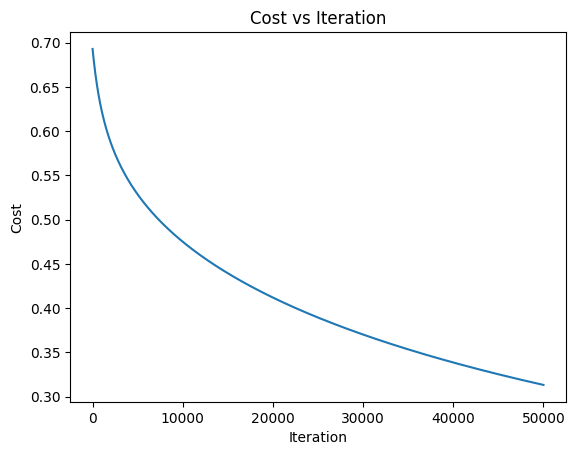

In [47]:
# Plot graph of cost vs iteration
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to make predictions
def predict(X, w, b):
    z = np.dot(X, w) + b
    h = compute_sigmoid(z)
    return (h >= 0.5).astype(int)

# Make predictions on training data
y_train_pred = predict(X_train_array, w_out, b_out)

# Make predictions on test data
y_test_pred = predict(X_test_array, w_out, b_out)

# Print metrics for training data
print("Metrics on Training Data:")
print(f"Accuracy: {accuracy_score(Y_train, y_train_pred)*100}")
print(f"Precision: {precision_score(Y_train, y_train_pred)}")
print(f"Recall: {recall_score(Y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(Y_train, y_train_pred)}")

# Print metrics for test data
print("\nMetrics on Test Data:")
print(f"Accuracy: {accuracy_score(Y_test, y_test_pred)*100}")
print(f"Precision: {precision_score(Y_test, y_test_pred)}")
print(f"Recall: {recall_score(Y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(Y_test, y_test_pred)}")


Metrics on Training Data:
Accuracy: 91.4375
Precision: 0.9190897597977244
Recall: 0.90875
F1 Score: 0.9138906348208674

Metrics on Test Data:
Accuracy: 66.0
Precision: 0.6666666666666666
Recall: 0.64
F1 Score: 0.6530612244897959
